## Mohammed AL-Sayed Agoor     --- G7

----------

## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20,50)
y = -2 * X + 1

In [3]:
X = X.reshape(-1,1)

In [4]:
X = np.insert(arr=X, values=1, obj=0, axis=1)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.40816327],
       [ 1.        ,  0.81632653],
       [ 1.        ,  1.2244898 ],
       [ 1.        ,  1.63265306],
       [ 1.        ,  2.04081633],
       [ 1.        ,  2.44897959],
       [ 1.        ,  2.85714286],
       [ 1.        ,  3.26530612],
       [ 1.        ,  3.67346939],
       [ 1.        ,  4.08163265],
       [ 1.        ,  4.48979592],
       [ 1.        ,  4.89795918],
       [ 1.        ,  5.30612245],
       [ 1.        ,  5.71428571],
       [ 1.        ,  6.12244898],
       [ 1.        ,  6.53061224],
       [ 1.        ,  6.93877551],
       [ 1.        ,  7.34693878],
       [ 1.        ,  7.75510204],
       [ 1.        ,  8.16326531],
       [ 1.        ,  8.57142857],
       [ 1.        ,  8.97959184],
       [ 1.        ,  9.3877551 ],
       [ 1.        ,  9.79591837],
       [ 1.        , 10.20408163],
       [ 1.        , 10.6122449 ],
       [ 1.        , 11.02040816],
       [ 1.        ,

In [5]:
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

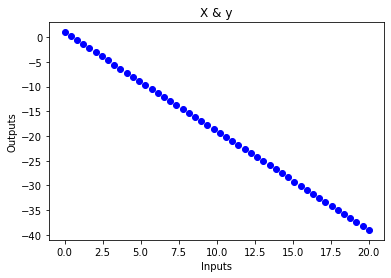

In [6]:
plt.scatter(X[:,1], y, c='b')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('X & y');

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [7]:
thetas = np.zeros(2)

In [8]:
def batch_GD(X, y, theta_input, alfa, iters):
    
    cost_steps = np.zeros(iters)
    theta_steps = np.zeros(iters*2).reshape(-1,2)
    
    for i in range(iters):
        
        h_theta = X @ theta_input
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        theta_input = theta_input - alfa * gradient
        
        
        # append in array
        theta_other = theta_input
        cost_steps[i] = cost
        theta_steps[i] = theta_other
        
    # return thetas final , thetas steps for each iteration , cost steps for each iteration
    return theta_input, theta_steps, cost_steps      

#### Try your function with any input parameterss of your choice.

In [9]:
theta_final, theta_steps, cost_steps = batch_GD(X, y, thetas, 0.0001, 1000)
print(theta_final)

[-0.11355273 -1.91716732]


In [10]:
final_vals = theta_final[0] + theta_final[1] * X[:,1]
final_vals

array([ -0.11355273,  -0.89607   ,  -1.67858727,  -2.46110455,
        -3.24362182,  -4.02613909,  -4.80865636,  -5.59117363,
        -6.3736909 ,  -7.15620817,  -7.93872545,  -8.72124272,
        -9.50375999, -10.28627726, -11.06879453, -11.8513118 ,
       -12.63382908, -13.41634635, -14.19886362, -14.98138089,
       -15.76389816, -16.54641543, -17.3289327 , -18.11144998,
       -18.89396725, -19.67648452, -20.45900179, -21.24151906,
       -22.02403633, -22.8065536 , -23.58907088, -24.37158815,
       -25.15410542, -25.93662269, -26.71913996, -27.50165723,
       -28.28417451, -29.06669178, -29.84920905, -30.63172632,
       -31.41424359, -32.19676086, -32.97927813, -33.76179541,
       -34.54431268, -35.32682995, -36.10934722, -36.89186449,
       -37.67438176, -38.45689904])

#### Calculate r2 score

In [11]:
from sklearn.metrics import r2_score

In [12]:
score_batch = r2_score(y, final_vals)
score_batch

0.9976984606392719

#### Plot loss vs. epochs

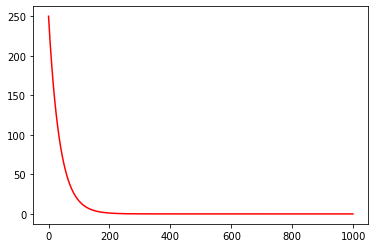

In [13]:
iters = np.arange(1000)
plt.plot(iters, cost_steps, c='r');

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

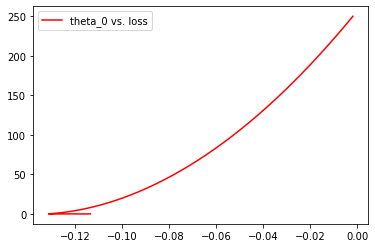

In [14]:
plt.plot(theta_steps[:,0], cost_steps, c='r', label='theta_0 vs. loss')
plt.legend();

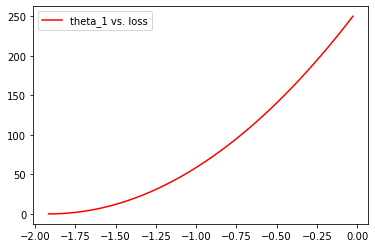

In [15]:
plt.plot(theta_steps[:,1], cost_steps, c='r', label='theta_1 vs. loss')
plt.legend();

#### Plot all regression lines till converge

In [16]:
def predict_each_line(theta_steps):
    
    predict_each = []
    
    for i in range(len(theta_steps)):
        final_vals = theta_steps[i,0] * X[:,0] + theta_steps[i,1] * X[:,1]
        predict_each.append(final_vals)
        
    predict_each = np.array(predict_each)
    return predict_each

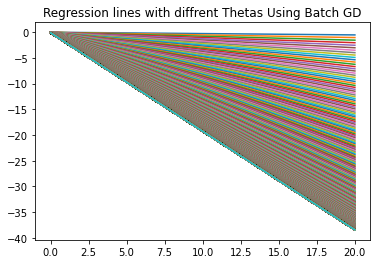

In [17]:
def plot_lines(theta_steps):
    
    predict_each = predict_each_line(theta_steps)
    for i in range (predict_each.shape[0]):
        
        plt.plot(X[:,1], predict_each[i])
        plt.title('Regression lines with diffrent Thetas Using Batch GD');
        
plot_lines(theta_steps)

#### Plot the best regression line

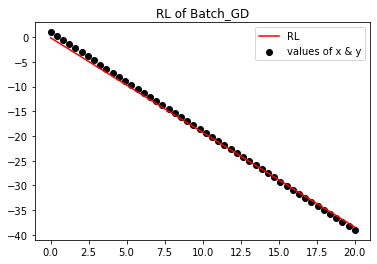

In [18]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], final_vals, c='r', label='RL')
plt.title('RL of Batch_GD')
plt.legend();

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [19]:
theta_final2, theta_steps2, cost_steps2 = batch_GD(X, y, thetas, 0.001, 2000)
print(theta_final2)

[ 0.31560204 -1.94909182]


In [20]:
final_vals2 = theta_final2[0] + theta_final2[1] * X[:,1]
final_vals2

array([  0.31560204,  -0.47994564,  -1.27549332,  -2.071041  ,
        -2.86658868,  -3.66213636,  -4.45768405,  -5.25323173,
        -6.04877941,  -6.84432709,  -7.63987477,  -8.43542245,
        -9.23097013, -10.02651782, -10.8220655 , -11.61761318,
       -12.41316086, -13.20870854, -14.00425622, -14.7998039 ,
       -15.59535158, -16.39089927, -17.18644695, -17.98199463,
       -18.77754231, -19.57308999, -20.36863767, -21.16418535,
       -21.95973303, -22.75528072, -23.5508284 , -24.34637608,
       -25.14192376, -25.93747144, -26.73301912, -27.5285668 ,
       -28.32411448, -29.11966217, -29.91520985, -30.71075753,
       -31.50630521, -32.30185289, -33.09740057, -33.89294825,
       -34.68849593, -35.48404362, -36.2795913 , -37.07513898,
       -37.87068666, -38.66623434])

In [21]:
r2_score(y, final_vals2)

0.9991306110643814

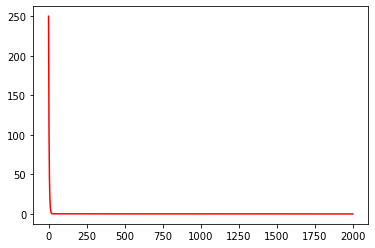

In [22]:
iters = np.arange(2000)
plt.plot(iters, cost_steps2, c='r');

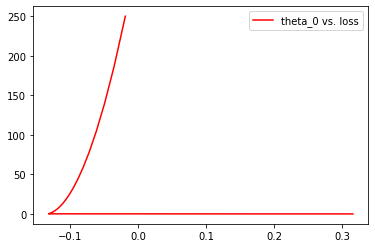

In [23]:
plt.plot(theta_steps2[:,0], cost_steps2, c='r', label='theta_0 vs. loss')
plt.legend();

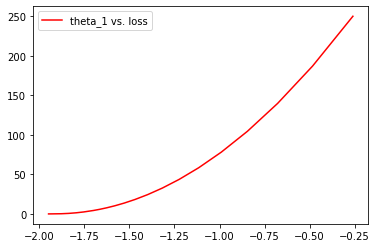

In [24]:
plt.plot(theta_steps2[:,1], cost_steps2, c='r', label='theta_1 vs. loss')
plt.legend();

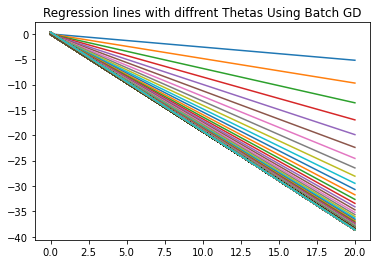

In [25]:
plot_lines(theta_steps2)

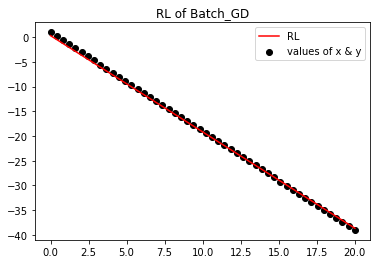

In [26]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], final_vals2, c='r', label='RL')
plt.title('RL of Batch_GD')
plt.legend();

## Mini Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [27]:
thetas_mini = np.zeros(2)

In [28]:
def mini_batch_GD(X, y, thetas_mini, alfa, epochs, batch_size):
    
    
    cost_steps = np.zeros(epochs)
    theta_steps = np.zeros(epochs*2).reshape(-1,2)
    
    num_batches = int(len(X) / batch_size)
    
  
    for j in range(epochs):
        
        begin = 0
        cost = 0
        
        for i in range(num_batches):
            
            X_batch = X[begin:begin+batch_size,:]
            y_batch = y[begin:begin+batch_size]

            h_theta = X_batch @ thetas_mini
            loss = h_theta - y_batch
            cost = np.sum(loss**2) / (2 * len(X_batch))
            gradient = (X_batch.T @ loss) / len(X_batch)

            thetas_mini = thetas_mini - alfa * gradient

            begin+=batch_size
            
            cost+=cost
        
        
        # append each epoch
        total_cost_each_epoch = cost
        
        theta_tempor = thetas_mini
        
        cost_steps[j] = total_cost_each_epoch
        theta_steps[j] = theta_tempor
            
        
    return thetas_mini, theta_steps, cost_steps

In [29]:
thetas_mini_final, thetas_steps_mini, cost_mini = mini_batch_GD(X, y, thetas_mini, 0.001, 1000, 10)

In [30]:
print('thetas_mini_final :', thetas_mini_final)

thetas_mini_final : [ 0.69030262 -1.97892563]


In [31]:
final_vals_mini = thetas_mini_final[0] + thetas_mini_final[1] * X[:,1]
print('final_vals_mini :', final_vals_mini)

final_vals_mini : [  0.69030262  -0.11742212  -0.92514687  -1.73287161  -2.54059636
  -3.34832111  -4.15604585  -4.9637706   -5.77149534  -6.57922009
  -7.38694483  -8.19466958  -9.00239432  -9.81011907 -10.61784382
 -11.42556856 -12.23329331 -13.04101805 -13.8487428  -14.65646754
 -15.46419229 -16.27191704 -17.07964178 -17.88736653 -18.69509127
 -19.50281602 -20.31054076 -21.11826551 -21.92599026 -22.733715
 -23.54143975 -24.34916449 -25.15688924 -25.96461398 -26.77233873
 -27.58006347 -28.38778822 -29.19551297 -30.00323771 -30.81096246
 -31.6186872  -32.42641195 -33.23413669 -34.04186144 -34.84958619
 -35.65731093 -36.46503568 -37.27276042 -38.08048517 -38.88820991]


In [32]:
scor_mini = r2_score(y, final_vals_mini)
print('Score mini :', scor_mini)

Score mini : 0.9998184089673984


In [33]:
thetas_steps_mini.shape

(1000, 2)

#### Cost vs. epochs

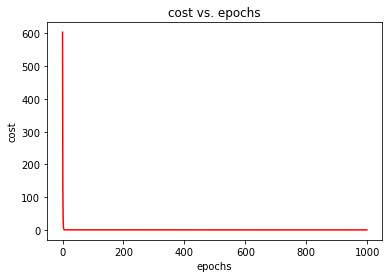

In [34]:
epochs = np.arange(1000)
plt.plot(epochs, cost_mini, c='r')
plt.title('cost vs. epochs')
plt.xlabel('epochs')
plt.ylabel('cost');

#### Cost vs. theta0 & theta1

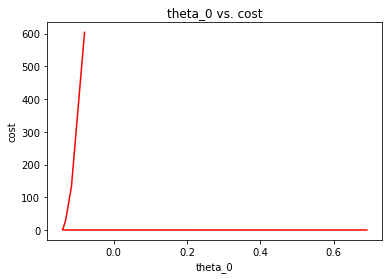

In [35]:
plt.plot(thetas_steps_mini[:,0], cost_mini, c='r')
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('theta_0 vs. cost')
plt.show()

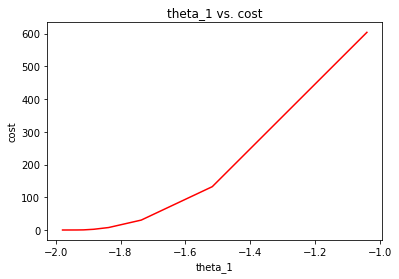

In [36]:
plt.plot(thetas_steps_mini[:,1], cost_mini, c='r')
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('theta_1 vs. cost')
plt.show()

#### Plot all RL

In [37]:
def predict_each_line_mini(theta_steps_mini):
    
    predict_each = []
    
    for i in range(len(theta_steps_mini)):
        final_vals = theta_steps_mini[i,0] * X[:,0] + theta_steps_mini[i,1] * X[:,1]
        predict_each.append(final_vals)
        
    predict_each = np.array(predict_each)
    return predict_each

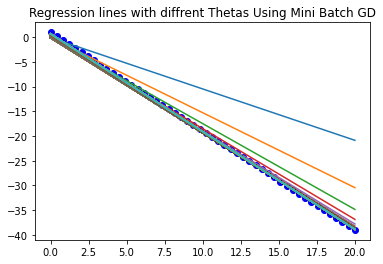

In [38]:
def plot_lines(theta_steps_mini):
    
    predict_each = predict_each_line_mini(theta_steps_mini)
    for i in range (predict_each.shape[0]):
        
        plt.plot(X[:,1], predict_each[i])
        plt.title('Regression lines with diffrent Thetas Using Mini Batch GD');
        
plot_lines(thetas_steps_mini)
plt.scatter(X[:,1],y, c='b');

#### Best RL

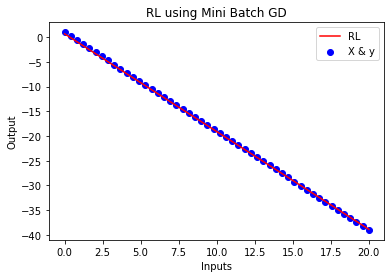

In [39]:
plt.scatter(X[:,1], y, c='b', label='X & y')
plt.plot(X[:,1], final_vals_mini, c='r', label='RL')
plt.xlabel('Inputs')
plt.ylabel('Output')
plt.title('RL using Mini Batch GD')
plt.legend()
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [40]:
thetas_stoch = np.zeros(2)

In [41]:
# define the function

def stochastic_GD(X, y, thetas_stoch, alfa, epochs):
    
    cost_steps = np.zeros(epochs)
    theta_steps = np.zeros(epochs*2).reshape(-1,2)
    
    # one Epoch = loop on all Dataset Rows
    
    for i in range(epochs):
        
        cost = 0
        
        for j in range(len(X)):
            
            X_j = X[j,:].reshape(1,-1)
            h_theta = X_j @ thetas_stoch
            loss = h_theta - y[j]
            cost = np.sum(loss**2)
            gradient = (X_j.T) @ loss
            
            thetas_stoch = thetas_stoch - alfa * gradient
              
            cost += cost
            
        # append each epoch
        total_cost_each_epoch = cost / (2 * len(X))
        
        theta_tempor = thetas_stoch
        cost_steps[i] = total_cost_each_epoch
        theta_steps[i] = theta_tempor
            
    return thetas_stoch, theta_steps, cost_steps        

#### Try with parameters

In [42]:
theta_final_stoch, theta_steps_stoch, cost_stoch = stochastic_GD(X, y, thetas_stoch, 0.001, 1000)

In [43]:
# final thetas 
print('theta_final_stoch : ', theta_final_stoch)

theta_final_stoch :  [ 0.99998291 -1.99999911]


## Check output of Stochastic using Mini Batch GD with Batch_Size = 1
with the same parameters

In [44]:
theta_check = np.zeros(2)

In [45]:
theta_check, thetas_steps_check, cost_steps_check = mini_batch_GD(X, y, thetas_mini, alfa=0.001, epochs=1000, batch_size=1)

In [46]:
print('theta_check :', theta_check)    #### The same exact Results 

theta_check : [ 0.99998291 -1.99999911]


#### Predict final values

In [47]:
# get predicted final values using stochastic GD
final_vals_stoch = theta_final_stoch[0] + theta_final_stoch[1] * X[:,1]
final_vals_stoch

array([  0.99998291,   0.18365674,  -0.63266943,  -1.4489956 ,
        -2.26532177,  -3.08164793,  -3.8979741 ,  -4.71430027,
        -5.53062644,  -6.34695261,  -7.16327877,  -7.97960494,
        -8.79593111,  -9.61225728, -10.42858345, -11.24490961,
       -12.06123578, -12.87756195, -13.69388812, -14.51021429,
       -15.32654045, -16.14286662, -16.95919279, -17.77551896,
       -18.59184513, -19.40817129, -20.22449746, -21.04082363,
       -21.8571498 , -22.67347597, -23.48980213, -24.3061283 ,
       -25.12245447, -25.93878064, -26.75510681, -27.57143297,
       -28.38775914, -29.20408531, -30.02041148, -30.83673765,
       -31.65306381, -32.46938998, -33.28571615, -34.10204232,
       -34.91836849, -35.73469465, -36.55102082, -37.36734699,
       -38.18367316, -38.99999933])

#### r2_score

In [48]:
score_stoch = r2_score(y, final_vals_stoch)
print('score_stoch :', score_stoch)

score_stoch : 0.999999999999317


In [49]:
# theta_steps_stoch for each epoch
print('theta_steps_stoch : ', theta_steps_stoch)

theta_steps_stoch :  [[-0.23552791 -1.9350033 ]
 [-0.2218668  -1.93649542]
 [-0.20825881 -1.93720299]
 ...
 [ 0.99998252 -1.99999909]
 [ 0.99998271 -1.9999991 ]
 [ 0.99998291 -1.99999911]]


#### cost vs. epochs

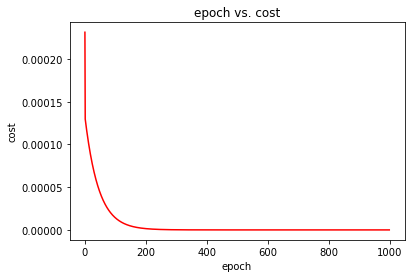

In [50]:
# plot epochs vs. cost
epoch = np.arange(1000)
plt.plot(epoch, cost_stoch, c='r')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('epoch vs. cost')
plt.show()

#### cost vs. theta0 and theta1

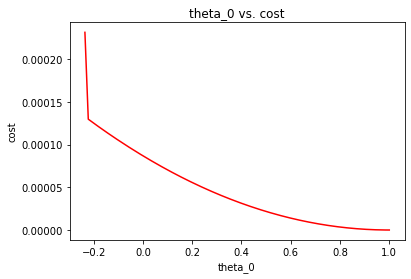

In [51]:
# plot theta_0 vs. cost
plt.plot(theta_steps_stoch[:,0], cost_stoch, c='r')
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('theta_0 vs. cost')
plt.show()

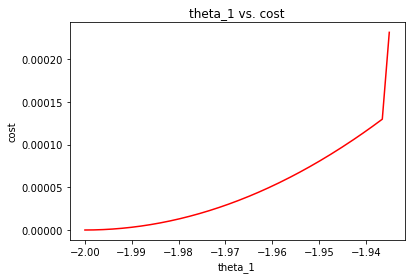

In [52]:
# plot theta_1 vs. cost
plt.plot(theta_steps_stoch[:,1], cost_stoch, c='r')
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('theta_1 vs. cost')
plt.show()

#### plot all regression lines

In [53]:
# plot all regression lines
def predict_each_line_stoch(theta_steps_stoch):
    
    predict_each = []
    
    for i in range(len(theta_steps_stoch)):
        final_vals = theta_steps_stoch[i,0] * X[:,0] + theta_steps_stoch[i,1] * X[:,1]
        predict_each.append(final_vals)
        
    predict_each = np.array(predict_each)
    return predict_each

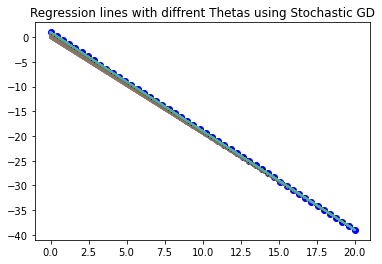

In [54]:
def plot_lines(theta_steps_stoch):
    
    predict_each = predict_each_line_stoch(theta_steps_stoch)
    for i in range (predict_each.shape[0]):
        
        plt.plot(X[:,1], predict_each[i,:])
        plt.title('Regression lines with diffrent Thetas using Stochastic GD');
        
plot_lines(theta_steps_stoch)
plt.scatter(X[:,1], y, c='b');

#### Best RL

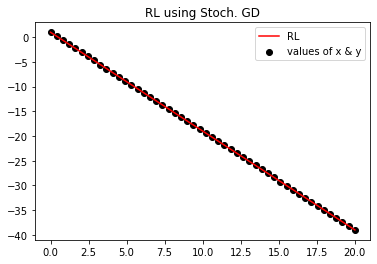

In [55]:
plt.scatter(X[:,1], y, c='k', label='values of x & y')
plt.plot(X[:,1], final_vals_stoch, c='r', label='RL')
plt.title('RL using Stoch. GD')
plt.legend();